In [ ]:
from google.colab import files
uploaded=files.upload()


Saving data set.csv to data set.csv


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr0aybtp3/vpvxokr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr0aybtp3/eq0k_mu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41180', 'data', 'file=/tmp/tmpr0aybtp3/vpvxokr5.json', 'init=/tmp/tmpr0aybtp3/eq0k_mu7.json', 'output', 'file=/tmp/tmpr0aybtp3/prophet_modelle7fwcii/prophet_model-20241217190700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:07:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


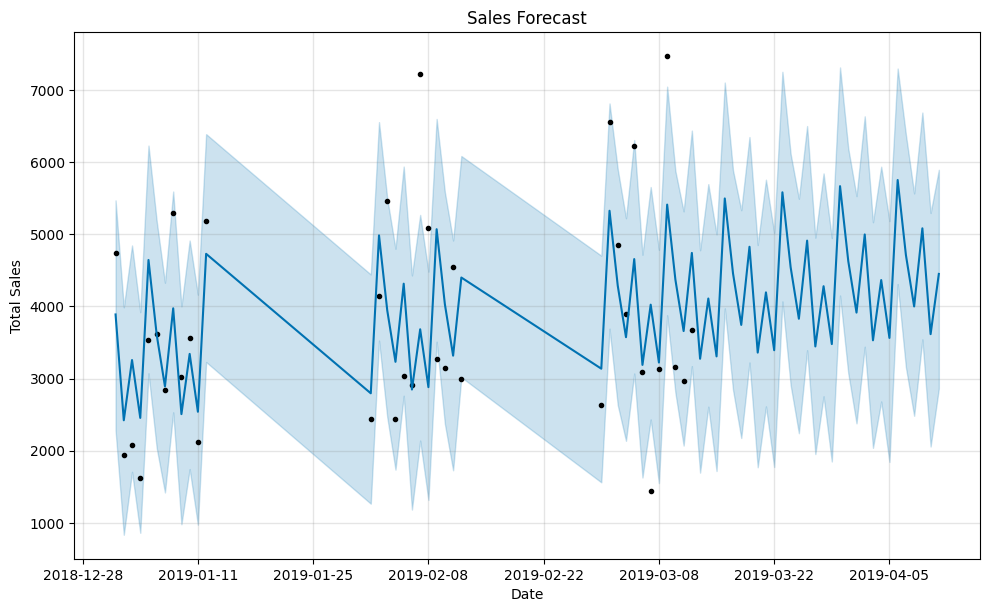

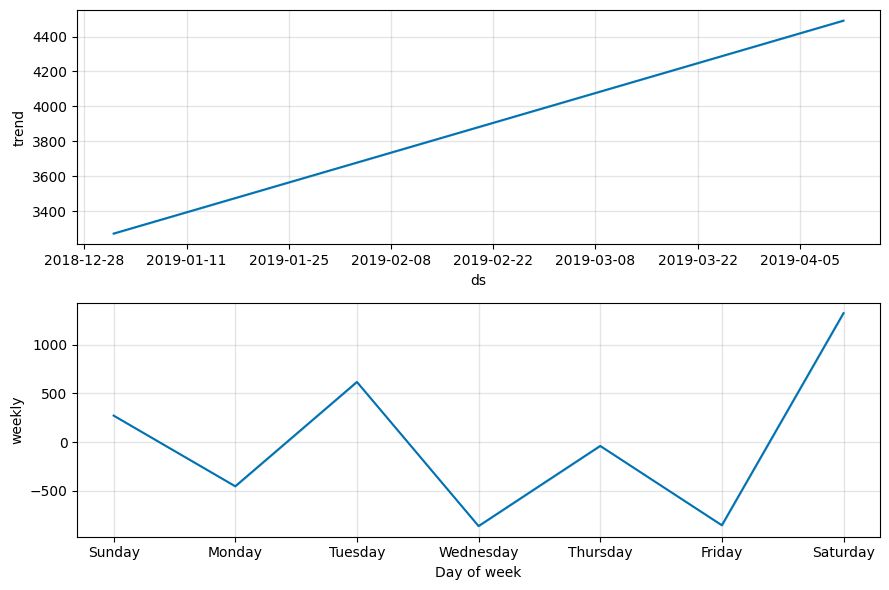

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = "data set.csv"
data = pd.read_csv(file_path)

# Prepare the data
sales_data = data[["Date", "Total"]].copy()
sales_data["Date"] = pd.to_datetime(sales_data["Date"], errors="coerce")
sales_data = sales_data.groupby("Date").sum().reset_index()
sales_data = sales_data.rename(columns={"Date": "ds", "Total": "y"})

# Initialize the Prophet model
model = Prophet()
model.fit(sales_data)

# Create future dates for predictions (e.g., next 30 days)
future_dates = model.make_future_dataframe(periods=30)
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Optional: Plot components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

# Save the forecasted data
forecast.to_csv("sales_forecast.csv", index=False)
